In [2]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [14]:
import sklearn

---
# Classifying handwritten digits

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png)

## Load the data

---

- There are 1797 images of handwritten digits of 8x8 pixels each    
- The dataset has 1797 rows and 64 columns
    - Each row is an image, each column is a pixel

<br>

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

print(digits.keys())
print(digits.images.shape)
print(digits.data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
(1797, 64)


<br> 

---
## Inspect the data

- An 8x8 pixel image can be displayed using matplotlib's `imshow`

<br>

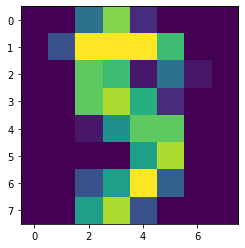

In [6]:
plt.imshow(digits.images[120]);

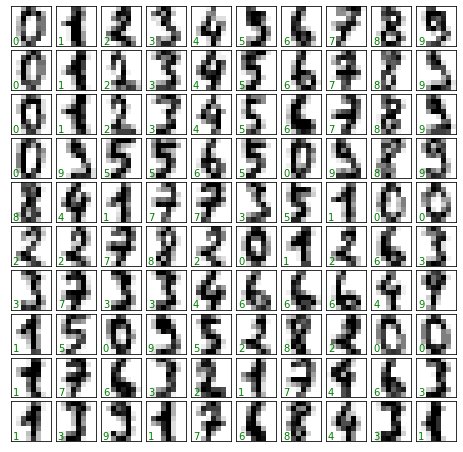

In [7]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In [8]:
digits_df = pd.DataFrame(digits.data, 
                         columns=["Pixel_" + str(i) for i in range(64)])

In [9]:
digits_df[:5]

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_54,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


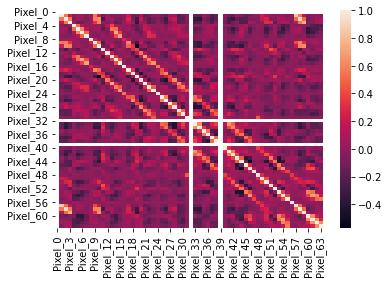

In [12]:
sns.heatmap(digits_df.corr());

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [17]:
# The Dependent Variable

import numpy as np
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### This is a Multiclass Classification Problem since the Dependent Variable has 10 classes

## Visualize the Classification Boundary using PCA

In [18]:
from sklearn.preprocessing import StandardScaler
X_digits = StandardScaler().fit_transform(digits.data)

In [19]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
data_2comp = pca_2.fit_transform(X_digits)

In [20]:
pca_2.explained_variance_ratio_.sum()

0.2159497046330575

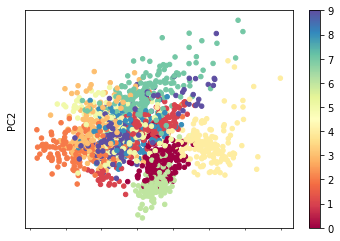

In [22]:
pd.DataFrame(data_2comp, 
          columns=['PC1', 'PC2']).plot.scatter(x='PC1', y='PC2', 
                                               c=digits.target, cmap='Spectral', 
                                               xticks=[], yticks=[]);

In [23]:
def EVR_by_NComp(n):
    """
    """
    pca_n = PCA(n_components=n)
    pca_n.fit(X_digits)
    return (n, round(pca_n.explained_variance_ratio_.sum(), 3))

In [25]:
list(map(lambda x: EVR_by_NComp(x), range(15, 30, 2)))

[(15, 0.709),
 (17, 0.746),
 (19, 0.778),
 (21, 0.807),
 (23, 0.831),
 (25, 0.851),
 (27, 0.869),
 (29, 0.886)]

In [26]:
# Selecting the 25 component solution that explains 85% of the variance.

X_pca = PCA(n_components=25).fit_transform(X_digits)

In [28]:
pd.DataFrame(X_pca)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.914211,-0.954497,-3.946042,2.028709,-0.267113,0.530210,-1.415583,1.496357,0.126213,-0.822851,...,0.105537,0.182922,-0.096960,0.408315,0.436791,0.427718,-0.567234,0.522016,-0.701862,-0.512705
1,0.588981,0.924635,3.924758,-1.779834,-0.993447,-0.675579,1.878617,0.556408,1.079326,0.087780,...,-0.214509,-0.097433,-0.420898,0.555487,-0.074917,0.923547,0.242590,-0.506540,0.481400,0.799082
2,1.302035,-0.317187,3.023327,-2.043385,-2.081112,0.934781,-1.296470,1.156667,0.786985,-1.100484,...,0.401301,-0.245303,-0.473588,-1.072736,-1.123339,-0.571233,-0.082525,-1.252093,-0.359978,-0.459528
3,-3.020770,-0.868777,-0.801751,-2.187055,-0.556851,0.727016,0.959662,-1.381560,0.259686,0.744120,...,-0.999575,-0.948005,-0.400174,1.482932,0.302147,0.559080,0.135787,0.538326,-0.477963,-0.091176
4,4.528950,-1.093477,0.973131,-1.419489,-1.715125,1.431823,1.073879,-0.969239,-1.661820,1.175329,...,0.209626,-0.090193,-0.550710,1.624783,1.077832,0.521186,0.210191,0.959848,-0.311179,0.705495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.104328,0.255030,-3.765861,-1.947006,-0.190015,-0.555818,0.531141,0.475967,1.153056,-0.473606,...,0.162837,0.501338,0.352631,-0.955377,0.823022,0.006036,0.800292,-0.647282,-0.096714,-0.340558
1793,2.423235,-1.429614,-3.045241,2.632090,-0.822932,0.004109,-1.106779,2.331059,0.569111,-1.654243,...,1.099506,0.302279,-0.306185,-0.306297,0.106822,-0.950228,0.032122,0.370139,0.053115,0.272149
1794,1.022598,-0.147906,2.469971,-0.620314,-0.971979,-0.007118,0.381251,0.527314,2.053739,-2.035483,...,1.156882,1.119766,0.666769,-1.603278,0.185747,0.179630,0.299532,0.090790,0.151838,-0.157765
1795,1.076052,-0.380904,-2.455491,-1.312010,0.253581,-0.638509,1.034267,0.763972,1.078579,-0.335587,...,0.161076,1.688698,0.805294,-1.772876,0.776034,-0.164308,0.408985,1.097718,0.323133,-1.024312


---

## Dimensionality Reduction with `Isomap`

- We'd like to visualize our points within the **64-dimensional parameter space**, but it's difficult to plot points in 64 dimensions!

- Instead we'll reduce the dimensions to 2, using an unsupervised method.

- Here, we'll make use of a **manifold learning algorithm** called *Isomap*, and transform the data to two dimensions.

- This is a critical step because it will lead to the selection of a few candidate algorithms that would possess the ability to discover the classfication boundary for this data.

In [29]:
from sklearn.manifold import Isomap, TSNE

In [30]:
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)
data_projected.shape

/Users/dkhosla/miniconda3/envs/pyds/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/dkhosla/miniconda3/envs/pyds/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

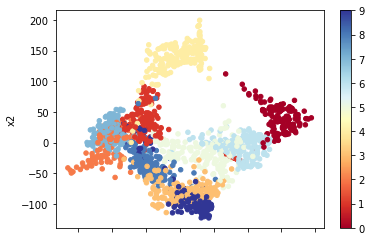

In [33]:
# Visualize the data in 2 dimensions

(pd.DataFrame(data_projected, columns=['x1', 'x2'])
 .plot
 .scatter(x='x1', y='x2', 
          c=digits.target, 
          cmap='RdYlBu'));

In [34]:
tsne = TSNE(n_components=2)
data_projected = tsne.fit_transform(digits.data)
data_projected.shape

/Users/dkhosla/miniconda3/envs/pyds/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/dkhosla/miniconda3/envs/pyds/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1797, 2)

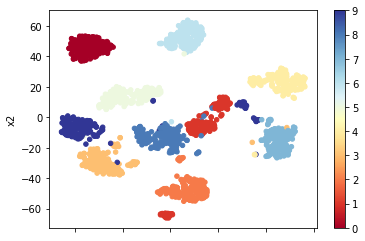

In [36]:
# Visualize the data in 2 dimensions

(pd.DataFrame(data_projected, columns=['x1', 'x2'])
 .plot
 .scatter(x='x1', y='x2', 
          c=digits.target, 
          cmap='RdYlBu'));

---
We see here that the digits are fairly well-separated in the parameter space; this tells us that a supervised classification algorithm should perform fairly well. 

Let's give it a try.

---

In [37]:
# Data Splitting
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(digits.data, 
                                                digits.target, 
                                                random_state=2)

In [196]:
round(Xtrain.shape[0]/1797.0, 2)

0.75

---

Q. Which of these sets will be used for

- training a model 
    - [Xtrain, yTrain]
- finding training accuracy/error 
    - [yTrain, predicted on Xtrain]
- finding out-of-sample accuracy/error 
    - [yTest, predicted on Xtest]
    
---    

In [197]:
# 75-25 Split on the data by default

print(Xtrain.shape, Xtest.shape)

((1347, 64), (450, 64))


---
### `Logistic Regression` with Default Hyperparameters

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import cross_val_score

from sklearn.cross_validation import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(digits.data, 
                                                digits.target)

clf = LogisticRegression()
clf.fit(Xtrain, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [199]:
# Training Accuracy
round(accuracy_score(Ytrain, clf.predict(Xtrain)), 3)

0.995

In [200]:
# Test Accuracy
round(accuracy_score(Ytest, clf.predict(Xtest)), 3)

0.969

In [201]:
Series(cross_val_score(clf, Xtest, Ytest, scoring='accuracy', cv=10)).describe()

count    10.000000
mean      0.937953
std       0.037650
min       0.863636
25%       0.918750
50%       0.934504
75%       0.956180
max       1.000000
dtype: float64

In [202]:
confusion_matrix(Ytest, clf.predict(Xtest))

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 45,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  2,  0,  2,  0,  0,  0,  0, 44,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 40]])

In [203]:
print(classification_report(Ytest, clf.predict(Xtest))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        45
          1       0.96      0.98      0.97        49
          2       1.00      0.96      0.98        47
          3       0.91      0.96      0.93        45
          4       1.00      0.98      0.99        45
          5       0.96      1.00      0.98        50
          6       0.97      1.00      0.99        36
          7       1.00      1.00      1.00        41
          8       0.94      0.90      0.92        49
          9       0.95      0.93      0.94        43

avg / total       0.97      0.97      0.97       450



> 
There are many ways to improve this classifier
* use a more sophisticated model, a
* apply cross validation, or 
* apply other techniques.

---
## Task 2

RE RUN THE DIGITS CLASSIFICATION USING SVM and report the accuracy for different settings of the `kernel` parameter.
'linear', 'rbf', 'poly'

---

In [204]:
from sklearn.svm import SVC

for K in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVC(kernel = K)
    clf.fit(Xtrain, Ytrain)
    print('For Kernel: ', K, ' the accuracy is: ', cross_val_score(clf, Xtest, Ytest, cv=10, scoring='accuracy').mean()

For Kernel:  linear  the accuracy is:  0.96037950354
For Kernel:  poly  the accuracy is:  0.970829451703
For Kernel:  rbf  the accuracy is:  0.218712554969
For Kernel:  sigmoid  the accuracy is:  0.109115077861


In [205]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(5, 26, 5):
    knn_obj = KNeighborsClassifier(n_neighbors=n)
    knn_obj.fit(Xtrain, Ytrain)
    ypred = knn_obj.predict(Xtest)
    print('For {} neighbors, the accuracy is: {}'.format(n, 
                                                       accuracy_score(Ytest, ypred))

For 5 neighbors, the accuracy is: 0.984444444444
For 10 neighbors, the accuracy is: 0.982222222222
For 15 neighbors, the accuracy is: 0.98
For 20 neighbors, the accuracy is: 0.975555555556
For 25 neighbors, the accuracy is: 0.966666666667


---
## Using GridSearchCV

In [206]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

In [207]:
GridSearchCV?

> Binary Classfication Problem: Performance Metrics on the Confusion Matrix

- http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
- https://en.wikipedia.org/wiki/Confusion_matrix

In [208]:
# Set the parameters by cross-validation
par_grid = {'kernel': ['poly', 'linear'], 
            'gamma': [1e-3, 1e-4], 
            'C': [1, 10, 100, 1000]}

gscv_svc = GridSearchCV(estimator=SVC(), 
                        param_grid=par_grid, 
                        cv=5, 
                        scoring='accuracy', 
                        verbose=True)

gscv_svc.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['poly', 'linear'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy',
       verbose=True)

In [209]:
gscv_svc.grid_scores_

[mean: 0.98664, std: 0.00608, params: {'kernel': 'poly', 'C': 1, 'gamma': 0.001},
 mean: 0.97996, std: 0.01401, params: {'kernel': 'linear', 'C': 1, 'gamma': 0.001},
 mean: 0.90869, std: 0.01048, params: {'kernel': 'poly', 'C': 1, 'gamma': 0.0001},
 mean: 0.97996, std: 0.01401, params: {'kernel': 'linear', 'C': 1, 'gamma': 0.0001},
 mean: 0.98664, std: 0.00608, params: {'kernel': 'poly', 'C': 10, 'gamma': 0.001},
 mean: 0.97996, std: 0.01401, params: {'kernel': 'linear', 'C': 10, 'gamma': 0.001},
 mean: 0.97773, std: 0.01134, params: {'kernel': 'poly', 'C': 10, 'gamma': 0.0001},
 mean: 0.97996, std: 0.01401, params: {'kernel': 'linear', 'C': 10, 'gamma': 0.0001},
 mean: 0.98664, std: 0.00608, params: {'kernel': 'poly', 'C': 100, 'gamma': 0.001},
 mean: 0.97996, std: 0.01401, params: {'kernel': 'linear', 'C': 100, 'gamma': 0.001},
 mean: 0.98812, std: 0.00723, params: {'kernel': 'poly', 'C': 100, 'gamma': 0.0001},
 mean: 0.97996, std: 0.01401, params: {'kernel': 'linear', 'C': 100, 'gam

In [210]:
gscv_svc.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'poly'}

In [211]:
gscv_svc.best_score_

0.9881217520415738

In [212]:
gscv_svc.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [213]:
print(classification_report(Ytest, gscv_svc.best_estimator_.predict(Xtest))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        45
          1       1.00      1.00      1.00        49
          2       1.00      1.00      1.00        47
          3       0.98      0.96      0.97        45
          4       1.00      1.00      1.00        45
          5       0.96      1.00      0.98        50
          6       1.00      1.00      1.00        36
          7       0.95      1.00      0.98        41
          8       1.00      0.98      0.99        49
          9       1.00      0.95      0.98        43

avg / total       0.99      0.99      0.99       450



In [214]:
accuracy_score(Ytrain, gscv_svc.best_estimator_.predict(Xtrain))

# An underfitted model would have a LOW TRAINING ACCURACY
# Therefore, our best model as found by GSCV is a good model that doesn't underfit.

1.0

In [215]:
accuracy_score(Ytest, gscv_svc.best_estimator_.predict(Xtest))

# An overfitted model would have much LOWER TEST ACCURACY as compared with TRAIN ACCURACY
# Here, we see that both Train and Test accuracy is high
# So our model is not Overfitting.

0.98888888888888893

---
# `scikit` Algorithms in Detail
---

## $support Vector Machines$

### T H E O R Y 


Support Vector Machines (SVMs) are 
- a powerful supervised learning algorithm 
- used for classification or for regression. 

---

```python
from sklearn.svm import SVC, SVR
SVC?
SVR?
```
---

SVMs are a **discriminative classifier**: that is, they draw a boundary between clusters of data.
- Immediately we see a problem: such a line is ill-posed! 
- For example, we could come up with several possibilities which perfectly discriminate between the classes
- Depending on which you choose, a new data point will be classified almost entirely differently!

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns
sns.set()

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.6, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

In [ ]:
xfit = np.linspace(-1, 3.5)
# generates 50 equally spaced points between -1 and 3.5

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
# creates a scatterplot of the blob data generated above

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9), (2, 0.5), (2.5, 0.15)]:
    plt.plot(xfit, m * xfit + b, '-k')
# we create 3 equations of straight lines (y = mx + c) and 
# plot them using xfit and arbitrary values of m, c

plt.xlim(-1, 3.5);
# ensures that the plot ends at the extremes of the data

### Maximizing the Margin

Support vector machines not only draw linear classification boundaries, 
- but consider a **region about the line** of some given width.

This is the intuition of **support vector machines**, 

>Optimize a linear discriminant model in conjunction with a **margin** representing the perpendicular distance between the datasets.

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
# plot the data created 

# in addition to the lines, we will shade areas around the lines (the 'd' parameter)
for m, b, d in [(1, 0.65, 0.3), (0.5, 1.6, 0.1), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

---
- A function to plot SVM decision boundaries

In [ ]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

---
## `scikit` Syntax for SVMs

## LINEAR KERNELS

We make use of the `SVC` estimators (Support Vector Classfiers)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

** Creating an interactive widget **

_**But what are support vectors?**_

- Notice that the dashed lines touch a couple of the points: these are known as the *support vectors* (giving the algorithm its name). 
- In scikit-learn, these are stored in the ``support_vectors_`` attribute of the classifier:

In [ ]:
from IPython.html.widgets import interact
from sklearn.datasets import make_blobs

def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

> Notice the **unique thing about SVM** is that **only the support vectors matter**: that is, if you moved any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results!


---

## NONLINEAR KERNELS

- Where SVM gets incredibly exciting is when it is used in conjunction with *kernels*.
- To motivate the need for kernels, let's look at some **data which is not linearly separable:**

In [ ]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(500, factor=.3, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

In [ ]:
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

** NOTE **
- Clearly, no linear discrimination will ever separate these data.
- One way we can adjust this is to apply a **kernel**, which _is some functional transformation of the input data._
- For example, one simple model we could use is a **radial basis function**

In [ ]:
X.shape

The radial basis transformation is defined as :   $r = e^{-(x_1^2 + x_2^2)}$

In [ ]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

If we plot this along with our data, we can see the effect of it:

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

We can see that **with this additional dimension, the data becomes trivially linearly separable!**

This is a relatively simple kernel; SVM has a more sophisticated version of this kernel built-in to the process. This is accomplished by using ``kernel='rbf'``, short for *radial basis function*:

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none');

---

### Steps in Python for Machine Learning

<big><br>

1. Import the Data
2. Clean (remove outliers, treat missing values, create bins, create dummies and so on)
3. Transform (Scaling or Dimensionality Reduction)
4. Visualize (and select a shortlist of models you want to try) [Dimensionality Reduction for DataViz]
5. Split the data
6. Build the models (includes feature extraction/engineering, feature selection)
7. Measure Performance of the Models and select the best one 
(includes hyperparameter optimization, and avoiding overfitting) [GridSearchCV]
8. Put everything inside a pipeline

---
## Appendix

---
### NumPy Refresher

Some important concepts/features of NumPy frequently used in `scikit-learn`.

**1. Creating and reshaping vectors, matrices**

    # Create a row vector
    y = np.linspace(0, 12, 5)
    # equally spaced 5 values between 0, 12
    print(y)

    # Turn it into a column vector
    print(y[:, np.newaxis])

    # Generating a random array
    X = np.random.random((3, 5))  
    # creates a 3 x 5 array

    # getting the shape or reshaping an array
    print(X.shape)
    print(X.reshape(5, 3))

    # Transposing an array
    print(X.T) 
    
**2. Sparse Matrices**

If we are working with large matrices and most of the values are zeros, storing this becomes memory inefficient. 

    from scipy import sparse
    sparse_X = sparse.csr_matrix(X)
    
    # convert it back
    sparse_X.toarray()
    
 The matrix is now stored as a list of indices and values, that keep track of all the non-zero values of the matrix. The CSR representation (compressed-sparse-row) is computationally very efficient.
 
There are different kinds of representations for Sparse matrices like CSR, CSE (compressed sparse columns) and others. The best representation depends upon the application.

---
### Further Reading

- [Official Documentation](http://scikit-learn.org/stable/user_guide.html)
- Highest Voted scikit-learn Questions
    - [on Stack Overflow](http://stackoverflow.com/questions/tagged/scikit-learn?sort=votes&pageSize=15)
    - [on Cross Validated](http://stats.stackexchange.com/questions/tagged/scikit-learn?sort=votes&pageSize=15)
    - [on Reddit](https://www.reddit.com/domain/scikit-learn.org/top/?sort=top&t=all)
- PyCon and PyData Videos (_youtube links_) 
    - [ML with scikit-learn - Jake Van Der Plas](https://www.youtube.com/watch?v=L7R4HUQ-eQ0) 
    - [Advanced ML with Scikit - Olivier Grisel](https://www.youtube.com/watch?v=iFkRt3BCctg)
- GitHub Repos
    - [Scikit-learn Tutorial @PyCon 2015 - Jake Van Der Plas](https://github.com/jakevdp/sklearn_pycon2015)
    - [Parallel ML - Olivier Grisel](https://github.com/ogrisel/parallel_ml_tutorial)
- Blogs
    - [Data Science in Python by yHat](http://blog.yhathq.com/posts/data-science-in-python-tutorial.html)
    
- CRISP-DM
    - [Cross Industry Standard Process for Data Mining](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining)
    
- Great visualization and explanation of Decision Trees
    - [Visual Explanation of Decision Trees](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
    
- DataTau
    - [The HackerNews of DataScience](www.datatau.com)
    
- A Few Important Things to Know about ML
    - [Paper as pdf](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)